<a href="https://example.com">Training School Diversity Notebook Session 3 (Non-programmers)</a> © 2026 by <a href="https://example.com">Louis Estève, Marie-Catherine de Marneffe, Nurit Melnik, Agata Savary, Olha Kanishcheva</a> is licensed under <a href="https://creativecommons.org/licenses/by-nc-sa/4.0/">CC BY-NC-SA 4.0</a><br/><img src="https://mirrors.creativecommons.org/presskit/icons/cc.svg" alt="" style="max-width: 1em;max-height:1em;margin-left: .2em;"><img src="https://mirrors.creativecommons.org/presskit/icons/by.svg" alt="" style="max-width: 1em;max-height:1em;margin-left: .2em;"><img src="https://mirrors.creativecommons.org/presskit/icons/nc.svg" alt="" style="max-width: 1em;max-height:1em;margin-left: .2em;"><img src="https://mirrors.creativecommons.org/presskit/icons/sa.svg" alt="" style="max-width: 1em;max-height:1em;margin-left: .2em;">

# UniDive Winter School - Diversity quantification (Non-programmers)

Welcome to this course in which we will show you how to quantify diversity, based on a framework we propose, inspired from practices in other scientific fields.

This interactive document contains the following sections:
*   **Section 1:** Diversity fundamentals
*   **Section 2:** Installations
*   **Section 3:** Measuring in-text diversity of toy examples
*   **Section 4:** Data preparation
*   **Section 5:** In-text diversity across genres
*   **Section 6:** Combinging genres to maximize in-text diversity



# **Section 1: Diversity fundamentals**

Here is a quick reminder of how diversity works. We need to have _elements_ that are apportioned into _categories_, where categories are what we measure the diversity of.

Let us go through an example
```markdown
  (1) To be or not to be is not always the question.
  (2) The fast runner runs much faster than the fastest runners ran.
```

## 1.1 Elements and categories
We can measure the diversity of words, and then unique word forms are categories and their instances are the elements. We can also measure the diversity of lemmas, and then lemmas are categories, and instances of all the word forms associated with the lemma are elements.

Once elements have been apportioned into categories, we can assess the three dimensions of diversity.

## 1.2 Variety

Variety is about the number of categories, the more categories there are, the more diverse.
Both (1) and (2) have 12 elements including the full stop,
but they do not have the same number of categories.

If word forms are categories, then (2) is more diverse, because it has 11 categories, while (1) has 9 categories.
If lemmas are categories, then (1) is more diverse, because it has 8 categories and (2) has 7 categories.

Throughout this notebook, we use the simplest pure variety, called richness, which is
$$
\text{richness} = n
$$
where $n$ is the number of categories.

## 1.3 Balance

Balance is about the evenness of the distribution of elements into categories. If we measure the diversity of word forms, (2) is more balanced since it has almost perfect evenness (only *the* occurs twice), unlike (1) where 3 words occur twice and 5 only once.

Throughout this notebook, we use Shannon evenness, which is a measure of pure balance, defined as empirical entropy divided by maximum entropy
$$
\text{Shannon evenness} = \frac{H}{H_{max}} = \frac{\sum\limits_{i=1}^{n}p_i\ln\left(p_i^{-1}\right)}{\ln\left(n\right)}
$$
where $n$ is the number of categories, and $p_i$ is the probability of the $i$th category.

On occasion, we will also use Shannon-Weaver entropy, which is part of the above equation.
$$
\text{Shannon-Weaver entropy} = \sum\limits_{i=1}^{n}p_i\ln\left(p_i^{-1}\right)
$$
Shannon-Weaver entropy is a hybrid of variety and balance. It will be used to order results, and is not the target of our experiments.

## 1.4 Disparity

Disparity is about the extent of the difference between categories, and thus requires to define a distance function between categories. Which of the two has greater disparity would depend on the distance function and on the way distances are aggregated.

Throughout this notebook, we will notably use pairwise disparity
$$
\text{pairwise} = \frac{1}{n(n-1)/2}
\sum\limits_{i=1}^{n}\sum\limits_{j=i+1}^{n}d_{i,j}
$$
where $n$ is the number of categories and $d_{i,j}$ is the distance between the $i$th and $j$th categories.

On occasion, we will also use Chao et al. (2014) entropy, at $\alpha=1$
$$
H^{\text{func}}_{\alpha \ne 1} = \left(\sum\limits_{i,j=1}^{n}d_{i,j}\times\left(\frac{p_ip_j}{Q}\right)^{\alpha}\right)^{\frac{1}{1-\alpha}}
$$
$$
H^{\text{func}}_1 = \lim\limits_{\alpha \rightarrow 1} H^{\text{func}}_{\alpha} = \sum\limits_{i,j=1}^{n}d_{i,j} \times \left(\frac{p_ip_j}{Q}\right) \left(-\ln\left(\frac{p_ip_j}{Q}\right)\right)
$$
$$
Q = \sum\limits_{i,j=1}^{n}d_{i,j}p_ip_j
$$

Chao et al.'s (2014) entropy is a hybrid of variety, balance, and disparity. It will be used to order results, and is not the target of our experiments.


# **Section 2. Installations**



This notebook runs on Python3. To know the specific version of Python3, run the following cell. It has been tested with Python 3.12.12.

In [3]:
!python3 --version

Python 3.12.12


The cell just below is meant to install the required external libraries, and
load both internal and external libraries.

| Library | Library type | Use | Will you interact with it |
| ------- | ------------ | --- | ------------------------- |
| `collections` | Internal | Data structures, the `Counter` objects will be our vocabulary objects | Yes |
| `json` | Internal | Process `*.json` data | No |
| `math` | Internal | Mathematical operations | No |
| `random` | Internal | Generation of random numbers and structures | No |
| `requests` | Internal | Obtaining data from the web | No |
| `subprocess` | Internal | Launching subprocesses | No |
| `typing` | Internal | Typing hints for variables and functions | No |
| `conllu` | External | Processing `*.conllu` data | No |
| `diversutils` | External | Computing diversity | Yes |
| `matplotlib` | External | Plotting | No |
| `numpy` | External | Numeric computing | No |
| `pandas` | External | Processing tabular data | No |
| `scipy` | External | Scientific computing | No |


<font color="red">📌 Run the following code cell.
If it ends successfully it means that all necessary (external or internal) libraries have been imported and correctly installed.</font>


In [4]:
# Installations. The first line installs `diversutils`, while the second
# installs other external packages.

!pip install --upgrade git+https://github.com/estevelouis/WG4@fe5936aaacd0213f8426ddfbf2eefc7bb25a4a28
!pip install conllu matplotlib numpy pandas scipy

# Imports from standard library. With the exception of custom builds of Python,
# you do not need to install anything for this to work.

from collections import Counter
import json
import math
import random
import requests
import subprocess
from typing import *

# Imports from external libraries.

import conllu
import diversutils
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp


  Cloning https://github.com/estevelouis/WG4 (to revision fe5936aaacd0213f8426ddfbf2eefc7bb25a4a28) to /tmp/pip-req-build-f2y6athi
  Running command git clone --filter=blob:none --quiet https://github.com/estevelouis/WG4 /tmp/pip-req-build-f2y6athi
  Running command git rev-parse -q --verify 'sha^fe5936aaacd0213f8426ddfbf2eefc7bb25a4a28'
  Running command git fetch -q https://github.com/estevelouis/WG4 fe5936aaacd0213f8426ddfbf2eefc7bb25a4a28
  Resolved https://github.com/estevelouis/WG4 to commit fe5936aaacd0213f8426ddfbf2eefc7bb25a4a28
  Running command git submodule update --init --recursive -q
  Preparing metadata (setup.py) ... done


# **Section 3. Measuring in-text diversity of toy examples**

In this section, we will use the `diversutils` library to measure the diversity of the two test sentences that we experimented with in Section 1.

We define our **category** by referring to the relevant CoNLL-U column (the CoNLL-U format is a tabular format described [here](https://universaldependencies.org/format.html)).

To do so, the following program performs the following steps:

1. Define a `sentence`, its `language`, and the `column` to use as categories. In our case, the elements will be individual words.
2. The sentence is parsed using UDPipe. The ouptut of the parse is stored in `conllu_raw`.
3. A list of the relevant elements is extracted from the CoNLL-U data, and elements are apportioned into categories (which means counting in our case).
4. A graph is created and categories are represented as nodes, where the node contains the number of elements, but not the name of the category, as we do not need it. The use of a graph is to have a shared interface amongst all diversity functions in `diversutils`. We refer to it as `graph` and it is meant to be given as an argument to methods of `diversutils`. Once all categories have been added to the `graph`, we compute the probability of each category.
5. Richness (a pure variety function) is measured using the key `diversutils.DF_INDEX_RICHNESS` given to the `diversutils.individual_measure` method.
6. Shannon evenness (a pure balance function) is measured using the key `diversutils.DF_INDEX_SHANNON_EVENNESS` given to the `diversutils.individual_measure` method.

---

_Note that more complex elements and categories can be used, but are beyond the scope of this notebook._

<font color="red">📌 Follow the instructions in the following code cell to measure the in-text diversity of test sentences.</font>

In [5]:
#==============================================================================
#===== Set the value of test_sentence by typing a sentence
#===== inside the quotes.
#===== Set the appropriate value for column ("lemma" or "form")
#===== Run the code in the cell.
#===== The CoNLL-U data and the results will be printed below the cell.
#==============================================================================

test_sentence = "To be or not to be is not always the question"
column = "lemma" # form, lemma, upos, xpos, feats, deprel
lang = "english"

################################################################################

# Parse the test sentence using UDPipe
query = " ".join(['curl', '--data', f'\'model={lang}&tokenizer=&tagger=&parser=&data={test_sentence.replace("'", '').replace('"', '').lower()}\'', 'https://lindat.mff.cuni.cz/services/udpipe/api/process', '2> /dev/null'])

# Get the conllu data from the parser
conllu_raw = json.loads(subprocess.getoutput(query))["result"]

# Print the conllu data
print("=" * 80)
print(conllu_raw)
print("=" * 80)

conllu_sentences = conllu.parse(conllu_raw)
if column == "feats":
  elements = sum([["_".join(f"{k}={v}" for k, v in tok[column].items()) for tok in conllu_sent] for conllu_sent in conllu_sentences], start=[])
else:
  elements = sum([[tok[column] for tok in conllu_sent] for conllu_sent in conllu_sentences], start=[])

################################################################################
# Create the graph
categories = Counter(elements)
graph = diversutils.create_empty_graph(0, 0)

for k, v in categories.most_common(): # order by decreasing frequency
  print(k, v)
  add_node_result = diversutils.add_node(graph, v) # adding a node containing the frequency v of category k
  if add_node_result != 0: # i.e. if an error while adding a node
    raise Exception(f"Failed to call diversutils.add_node(graph, v). Result status: {add_node_result}")
diversutils.compute_relative_proportion(graph) # calculating the probability of each category in the working graph

# Call the diversity functions
variety = diversutils.individual_measure(graph, diversutils.DF_INDEX_RICHNESS)[0]
balance = diversutils.individual_measure(graph, diversutils.DF_INDEX_SHANNON_EVENNESS)[0]

# Free the graph.
diversutils.free_graph(graph)

print("=" * 80)
print(f"Variety (richness): {int(variety)}, balance (Shannon evenness): {balance:.3f}")


# generator = UDPipe 2, https://lindat.mff.cuni.cz/services/udpipe
# udpipe_model = english-ewt-ud-2.17-251125
# udpipe_model_licence = CC BY-NC-SA
# newdoc
# newpar
# sent_id = 1
# text = to be or not to be is not always the question
1	to	to	PART	TO	_	2	mark	_	_
2	be	be	AUX	VB	VerbForm=Inf	11	cop	_	_
3	or	or	CCONJ	CC	_	4	cc	_	_
4	not	not	PART	RB	Polarity=Neg	2	conj	_	_
5	to	to	PART	TO	_	6	mark	_	_
6	be	be	AUX	VB	VerbForm=Inf	2	conj	_	_
7	is	be	AUX	VBZ	Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin	11	cop	_	_
8	not	not	PART	RB	Polarity=Neg	11	advmod	_	_
9	always	always	ADV	RB	PronType=Tot	11	advmod	_	_
10	the	the	DET	DT	Definite=Def|PronType=Art	11	det	_	_
11	question	question	NOUN	NN	Number=Sing	0	root	_	SpaceAfter=No


be 3
to 2
not 2
or 1
always 1
the 1
question 1
Variety (richness): 7, balance (Shannon evenness): 0.949


# **Section 4: Data preparation**

After experimenting with a toy example, we will now move to bigger dataset. We will work on data from the [GUM dataset](https://gucorpling.org/gum/), which is divided into genres. The 15 genres in this dataset are roughly equivalent in sizes. We will use the `diversutils` library to measure and compare the in-text diversity of the different genre sub-corpora.

This section contains the code that is needed to rerieve the data and prepare it for analysis.

<font color="red">📌 Simply run all the cells. No need to modify anything.</font>

## 4.1 Available genres

In the following cell, the `ALL_GENRES` constant is the list of genres present
in the GUM dataset.

In [6]:
ALL_GENRES: List[str] = [
    "academic",
    "bio",
    "conversation",
    "court",
    "essay",
    "fiction",
    "interview",
    "letter",
    "news",
    "podcast",
    "speech",
    "textbook",
    "vlog",
    "voyage",
    "whow"
]

## 4.2 Retrieving the data of each genre.

The two cells below are meant to work with items of `ALL_GENRES`. They retrieve
the data we are going to use for the experiment. Sentences of each genre are then stored separately in `sentences_per_genre`. They can be accessed as follows: `sentences_per_genre["academic"]`.

In [16]:
def _get_conllu_raw_for_genre(genre: str) -> str:
    """
    This function takes a `genre` as input and downloads the raw CoNLL-U data
    (i.e. strings) for this genre. This raw CoNLL-U data is the result.
    """

    conllu_request = requests.get(f"https://github.com/UniDive/2026-UniDive-Yerevan-training-school/raw/refs/heads/main/Diversity-quantification-course/session-3-measuring-in-text-diversity-in-nlp/GUM-subcorpus/{genre}.conllu")

    conllu_raw = conllu_request.text
    return conllu_raw

In [8]:
def _get_sentences_for_genre(genre: str) -> List[conllu.TokenList]:
    """
    This function gets the raw CoNLL-U data for the genre and parses it into
    usable structures. It returns a list of sentences.
    """

    conllu_raw = _get_conllu_raw_for_genre(genre=genre)
    sentences = conllu.parse(conllu_raw)
    return sentences

We now group sentences based on their genre.

In [17]:
sentences_per_genre: dict[str, List[conllu.TokenList]] = {
    genre: _get_sentences_for_genre(genre) for genre in ALL_GENRES
}

 We display the number of sentences
as well as the number of tokens in each genre. As you can see, the number of
sentences per genre is quite disparate, but the number of tokens is roughly
comparable.

In [18]:
genres = []
df_dict = {key: [] for key in ["sentences", "tokens"]}

for k in sentences_per_genre.keys():
    num_sentences: int = len(sentences_per_genre[k])
    num_tokens: int = sum(len(sent) for sent in sentences_per_genre[k])
    genres.append(k)
    df_dict["sentences"].append(num_sentences)
    df_dict["tokens"].append(num_tokens)

df_genres = pd.DataFrame(df_dict, index=genres)
df_genres

,sentences,tokens
academic,633,17216
bio,771,18343
conversation,2016,18666
court,573,11409
essay,502,10976
fiction,1070,17815
interview,1067,18497
letter,536,10092
news,765,17387
podcast,683,12446


# **Section 5: in-text diversity across genres**

In this section, we perform a simple measurement of the diversity of each individual genre. We must define our **elements** and **categories**. Similarly to the way that we measured the in-text diversity of the toy example, here too we will define the category by setting the value of `CONLLU_COLUMN_USED_AS_CATEGORY` to "form", if we want to use surface word forms as categories, and to "lemma" for lemmas as categories. As this is a word-based format, each individual word consistutes an element.
The constant `MAX_OUTPUT_DATASET_TOKEN_COUNT` denotes the maximum number of tokens in the output dataset.


---

_Note that more complex elements and categories can be used, but are beyond the scope of this notebook._

---



## 5.1 Code for measuring diversity of genres (non-programmers)

The following code contains two functions which calculate the diversity of a list of genres and CoNLL-U sentences.
We will calculate the diversity of lemmas, but if you prefer other categories you can modify the value of `CONLLU_COLUMN_USED_AS_CATEGORY`.
To test the code which you will program here, run the code from the following section.

<font color="red">📌 Run the code to define the functions.</font>

In [11]:
################################################################################

MAX_OUTPUT_DATASET_TOKEN_COUNT: int = 10000
CONLLU_COLUMN_USED_AS_CATEGORY: str = "form"

################################################################################

result: List[Tuple[List[str], Tuple[float]]] = []
x: List[float] = []
y: List[float] = []

################################################################################

def _get_diversity_from_sentences(sentences: List[conllu.TokenList]) -> Tuple[float]:
    """
    This function takes a list of CoNLL-U sentences.

    It returns a 3-tuple of diversity scores: variety, balance, entropy (which
    is a variety-balance hybrid).
    """

    assert type(sentences) == list and all(type(x) == conllu.TokenList for x in sentences), f"'sentences' argument must be of type List[conllu.TokenList]"
    assert len(sentences) > 0

    voc: Counter = Counter()
    for sent in sentences:
        voc += Counter(tok[CONLLU_COLUMN_USED_AS_CATEGORY] for tok in sent)

    # `voc` is a Counter object, which is essentially just a fast dictionnary.
    # Its keys are of type `str`, and correspond to categories.
    # Its values of type `int`, and correspond to the number of elements per
    # categories.
    #
    # We now need to transfer this information to `diversutils`, which will
    # return the diversity scores we need. Here are the steps to follow, as
    # explained in the course.
    #     (1) Create an empty graph, which will be referred to with an `int`
    #     (2) For each category, add a node to the graph, with an indication
    #         of the number of elements.
    #     (3) Once all categories have been added as nodes, tell `diversutils`
    #         to compute the distribution (i.e., computing relative
    #         proportions).
    #     (4) Compute variety, balance, and entropy (each is an 'individual
    #         measure') and store them in variables of identical names.
    #     (5) (optional) Tell `diversutils` to free the graph, so as to reduce
    #         memory usage. If not done, `diversutils` will free all remaining
    #         graphs at the end of the process.
    #
    # Note that for this description, the terms we used are quite similar to
    # the names of methods you have to call. Therefore, running
    # `print(dir(diversutils))` may help you know which methods are available,
    # and which to use

    # <STUDENT-TODO>
    graph: int = diversutils.create_empty_graph(0, 0) # (1)
    for k, v in voc.items():
        add_node_result: int = diversutils.add_node(graph, v) # (2)
        if add_node_result != 0:
            raise Exception(f"Failed to call diversutils.add_node(graph, v). Return status: {add_node_result}")
    diversutils.compute_relative_proportion(graph) # (3)
    variety: float = diversutils.individual_measure(graph, diversutils.DF_INDEX_RICHNESS)[0] # (4)
    balance: float = diversutils.individual_measure(graph, diversutils.DF_INDEX_SHANNON_EVENNESS)[0] # (4)
    entropy: float = diversutils.individual_measure(graph, diversutils.DF_ENTROPY_SHANNON_WEAVER)[0] # (4)
    diversutils.free_graph(graph) # (5)
    # </STUDENT-TODO>

    return variety, balance, entropy

################################################################################

def get_diversity_for_genres(genres: Tuple[str]) -> Tuple[float]:
    """
    This function takes a list of genres (e.g. ("court", "vlog")).

    A maximum of `MAX_OUTPUT_DATASET_TOKEN_COUNT` sentences are taken, to ensure
    comparability between output datasets of possibly different sizes.

    It returns a 3-tuple of diversity scores: variety, balance, entropy (which
    is a variety-balance hybrid).
    """

    assert type(genres) == tuple and all(type(v) == str for v in genres), f"'genres' argument must be of type Tuple[str]. Received type: {type(genres)}"
    assert len(set(genres)) == len(genres), "'genres' must not contain duplicate genres."
    assert all(genre in ALL_GENRES for genre in genres), f"'genres' contains genre(s) which are unknown: {list(filter(lambda x: x not in ALL_GENRES, genres))}. Available genres (as stored in variable ALL_GENRES): {ALL_GENRES}."

    all_selectable_sentences: List[conllu.TokenList] = sum((sentences_per_genre[genre] for genre in genres), start=[])
    random.seed(123456789)
    random.shuffle(all_selectable_sentences)

    n: int = len(all_selectable_sentences)

    i: int = 0
    num_tokens: int = 0
    while(num_tokens < MAX_OUTPUT_DATASET_TOKEN_COUNT and i < n):
      num_tokens += len(all_selectable_sentences[i])
      i += 1
    selected_sentences: List[conllu.TokenList] = all_selectable_sentences[:i]
    diversity: Tuple[float] = _get_diversity_from_sentences(selected_sentences)

    variety, balance, entropy = diversity
    result.append((sorted(genres), diversity))
    x.append(variety)
    y.append(balance)

    return diversity

## 5.2 Single genre diversity

Which genres of all those represented in GUM do you think is the most diverse?

The following code cell runs the functions that are defined in the previous code cell and computes the Variety, Balance and Entropy of a given genre.

<font color="red">📌 Follow the instructions in the following code cell to check your intutions by calling the diversity function with different genres.</font>

In [12]:
#==============================================================================
#===== Set the value of the variable "genre" with one of GUM's genres
#===== and run the code.
#==============================================================================

genre = "conversation"

variety, balance, entropy = get_diversity_for_genres((genre,))

print(f"Genre: {genre}")
print(f"Variety: {int(variety)}")
print(f"Balance: {balance:.4f}")
print(f"Entropy: {entropy:.4f}")

Genre: conversation
Variety: 1573
Balance: 0.7673
Entropy: 5.6482


## 5.3 Plotting the variety of genres against their balance
The code in the following cell computes the three diversity scores for each of the genres in the GUM dataset and plots them on a variety/balance diagram.

<font color="red">📌 Run the code to see the results. Do they match your expectations?</font>


,variety,balance,entropy
conversation,1573.0,0.767338,5.648174
vlog,1653.0,0.783720,5.807637
podcast,1946.0,0.780090,5.908033
court,1940.0,0.789776,5.978952
speech,2423.0,0.795939,6.202564
fiction,2563.0,0.794345,6.234760
whow,2427.0,0.809369,6.308554
interview,2574.0,0.810951,6.368574
academic,2653.0,0.808119,6.370762
letter,2706.0,0.808093,6.386541


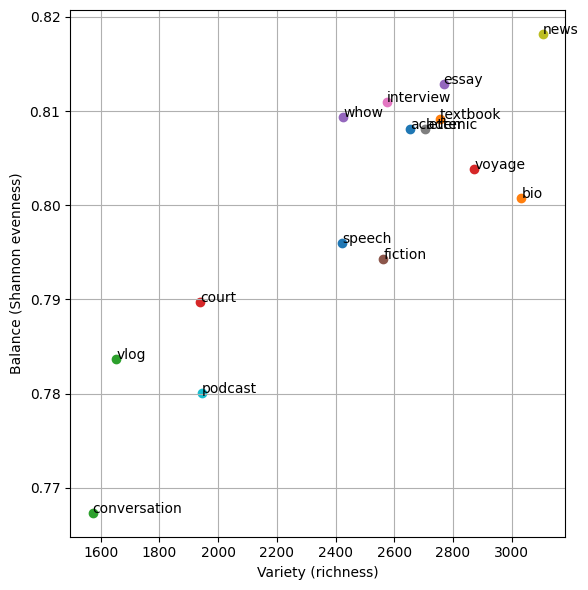

In [13]:
fig, ax = plt.subplots(figsize=(6, 6))

df_dict = {key: [] for key in ["variety", "balance", "entropy"]}

for genre in ALL_GENRES:
  variety, balance, entropy = get_diversity_for_genres((genre,))
  ax.scatter([variety], [balance], label=genre)
  ax.annotate(xy=(variety, balance), text=genre)
  df_dict["variety"].append(variety)
  df_dict["balance"].append(balance)
  df_dict["entropy"].append(entropy)

df_diversity_single_genres = pd.DataFrame(df_dict, index=ALL_GENRES).sort_values("entropy")

ax.set_xlabel("Variety (richness)")
ax.set_ylabel("Balance (Shannon evenness)")
plt.grid(which="major", axis="both")
plt.tight_layout()
plt.plot()

df_diversity_single_genres

# **Section 6: Combining genres to maximize in-text diversity**

When creating a dataset, diversity is often a goal. One way of achieving this goal is to combine texts of different genres. Which combination of three genres would you pick to get the maximally diverse dataset? We will use the functions that we have defined to test different combinations.

<font color="red">📌 Run the following code cell to define the function `plot` for plotting the diversity measures of the various genre combinations.</font>

In [14]:
def plot():
  # Printing to the screen.

  df_dict = {key: [] for key in ["variety", "balance", "entropy"]}
  genres = []
  for z in result:
      variety, balance, entropy = z[1]
      df_dict["variety"].append(variety)
      df_dict["balance"].append(balance)
      df_dict["entropy"].append(entropy)
      genres.append(', '.join(z[0]))
  df_plot = pd.DataFrame(df_dict, index=genres).sort_values("entropy")

  ################################################################################

  # Plotting.

  fig, ax = plt.subplots(figsize=(7,7))
  ax.scatter(x, y)

  if len(x) > 1:
    pearson_coefficient, pearson_coefficient_p_value = tuple(float(v) for v in sp.stats.pearsonr(x, y))
  else:
    pearson_coefficient, pearson_coefficient_p_value = np.nan, np.nan

  ax.set_xlabel("Variety (richness)")
  ax.set_ylabel("Balance (Shannon evenness)")
  plt.suptitle(f"Pearson correlation coefficient: $r={pearson_coefficient:+.3f}$ ($p={pearson_coefficient_p_value:.3e}$)")
  plt.grid(which="major", axis="both")
  plt.tight_layout()
  plt.plot()

  return df_plot


## 6.1 Printing results and plotting (for everyone)

The function `get_diversity_for_genres` receives a tuple (i.e. a list in parentheses) of genres and returns a tuple of three values: variety (\~2000), balance (0-1), entropy (\~6-7).
For example: `get_diversity_for_genres(("court", "vlog", "fiction"))`.

You can call the function multiple times, each time with a different set of genres. To do so, just copy the line with the name of the function and adjust the list of genres inside the parentheses.
The results of each call are stored in memory. The call to the `plot` function at the end of the code cell plots all the results.  **Use this code to try to find a subset of 3 distinct genres which maximizes for variety and balance** (the function `get_diversity_for_genre` returns an error if genres are duplicated).



,variety,balance,entropy
"court, fiction, vlog",2372.0,0.793261,6.164817


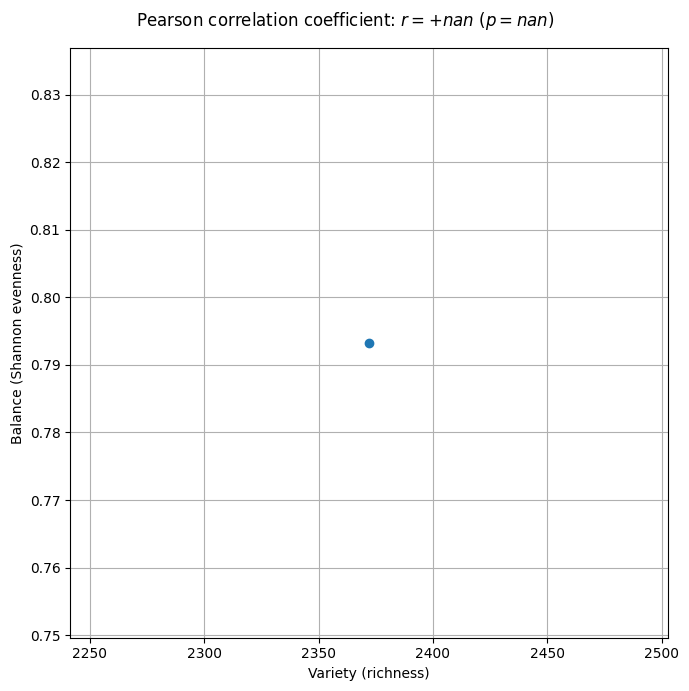

In [15]:
result = []
x = []
y = []

################################################################################

get_diversity_for_genres(("court", "vlog", "fiction"))
# Insert here other calls of this function with different sets of genres
# ...
# ...
plot()